# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data = np.loadtxt('./data.txt', delimiter = ',')

In [3]:
x_train, y_train = data[:,:2], data[:,-1]

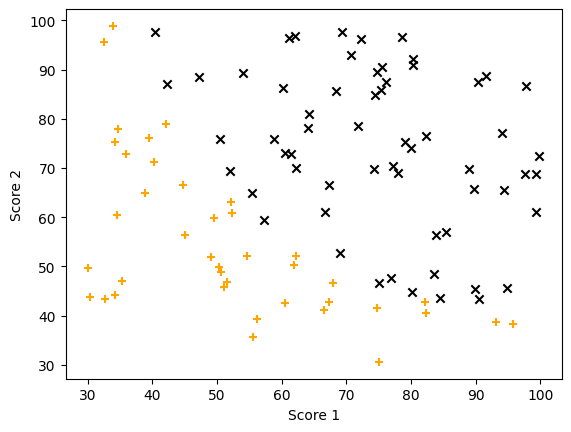

In [4]:
for i in range(len(y_train)):
    if y_train[i] == 1:
        plt.scatter(x_train[i,0], x_train[i,1], marker = 'x', color = 'black')
    elif y_train[i] == 0:
        plt.scatter(x_train[i,0], x_train[i,1], marker = '+', color = 'orange')
plt.xlabel('Score 1')
plt.ylabel('Score 2') 
plt.show()

In [5]:
def sigmoid(z):
    result = 1/(1+np.exp(-z))
    
    return result

print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


### Defining the cost function 

In [6]:
def computeCost(X, y, w, b, lambda_= 1):
    m, n = X.shape
    J = 0 
    for i in range(m):                   #training example
        z_wb = 0 
        for j in range(n):               #features
             z_wb_ij =  w[j]*X[i][j]
             z_wb += z_wb_ij             # z_wb = z_wb + z_wb_ij
        z_wb += b                        # z_wb = z_wb + b
        f_wb = sigmoid(z_wb)
        J += (-y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)) #log loss 
    total_cost = (1 / m) * J

    return total_cost

In [7]:
m, n = x_train.shape
init_w = np.zeros(n)
init_b = 0.
cost = computeCost(x_train, y_train, init_w, init_b)
print('Cost at initial parameters set to 0:', cost)

Cost at initial parameters set to 0: 0.693147180559946


### Defining the gradient descent

In [8]:
def compute_gradient(X, y, w, b, lambda_=None): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        z_wb = 0
        for j in range(n): 
            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij
        z_wb += b
        f_wb = sigmoid(z_wb)
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw_ij = (f_wb - y[i])* X[i][j] 
            dj_dw[j] += dj_dw_ij 
            
    dj_dw = dj_dw / m
    dj_db = dj_db / m
        
    return dj_db, dj_dw

In [9]:
init_w = np.zeros(n)
init_b = 0.

dj_db, dj_dw = compute_gradient(x_train, y_train, init_w, init_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


### Learning Parameters

In [10]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    m = len(X)
    J_history = []
    w_history = []
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

    return w_in, b_in, J_history

In [12]:
np.random.seed(1)
init_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
init_b = -8

iterations = 10000
alpha = 0.001

w,b, J_history = gradient_descent(x_train ,y_train, init_w, init_b, 
                                   computeCost, compute_gradient, alpha, iterations, 0)

In [13]:
print(w)

[[0.07125355]
 [0.06482888]]


In [14]:
yy = (w[0] * x_train[:, 0] + w[1] * x_train[:, 1] + b > 0).astype(int)
def decision_boundary(x, w, b):
    return - (w[0] * x + b) / w[1]

In [15]:
x_values = np.linspace(20, 100)
y_values = decision_boundary(x_values, w,  b)

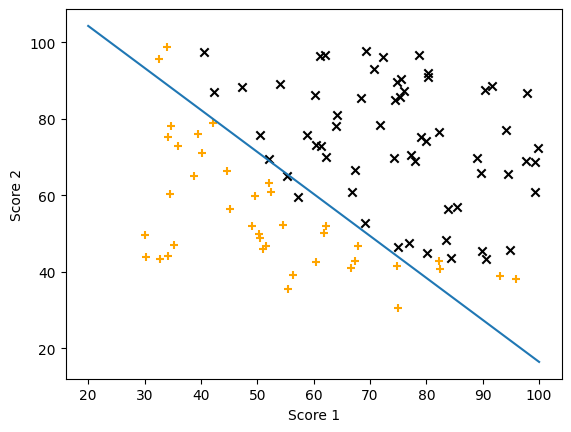

In [16]:
for i in range(len(y_train)):
    if y_train[i] == 1:
        plt.scatter(x_train[i,0], x_train[i,1], marker = 'x', color = 'black')
    elif y_train[i] == 0:
        plt.scatter(x_train[i,0], x_train[i,1], marker = '+', color = 'orange')
plt.plot(x_values, y_values)
plt.xlabel('Score 1')
plt.ylabel('Score 2') 
plt.show()

### Predicting

In [17]:
def predict(X, w, b): 
    m, n = X.shape   
    p = np.zeros(m)
    for i in range(m):   
        z_wb = 0
        for j in range(n): 
            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij
        z_wb += b
        
        f_wb = sigmoid(z_wb)
        p[i] = f_wb >= 0.5
    return p

In [22]:
p = predict(x_train, w,b)
print('Train Accuracy: ',(np.mean(p == y_train) * 100))

Train Accuracy:  92.0
